In [3]:
import numpy as np
from keras import models
from keras import layers
from keras.initializers import glorot_uniform

### 1、Identity Block
第 l 层卷积的输出越过两个隐层，直接到达第 l+3 层作为激活函数的输入
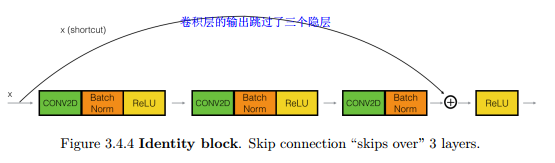

In [4]:
def identity_block(X, f, filters, stage, block):
    """
    identity block 的实现代码
    
    Args:
        X: input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
        f: 整数类型，表示卷积核的尺寸
        filters: 包含整数元素的 list 类型数据，分别表示每一层卷积核的个数
        stage: 整数类型，用来对网络中的层进行命名
        block: string/character，used to name the layers, depending on their position in the network
    Returns:
        X: output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # define the name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # 分别获取三层卷积层中卷积核的数目
    F1, F2, F3 = filters
    # 保存输入的信息，因为在后面跳跃到的激活层中需要用到
    X_shortcut = X
    
    ########### Main Path ############
    # First component of main path
    X = layers.Conv2D(filters = F1, kernel_size = (1, 1), strides = (1, 1),
                     padding = 'valid', name = conv_name_base + '2a',
                     kernel_initializer = glorot_uniform(seed = 0))(X)
    X = layers.BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)
    
    # Second component of main path
    X = layers.Conv2D(filters = F2, kernel_size = (f, f), strides = (1, 1),
                     padding = 'same', name = conv_name_base + '2b',
                     kernel_initializer = glorot_uniform(seed = 0))(X)
    X = layers.BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)
    
    # Third component of main path
    X = layers.Conv2D(filters = F3, kernel_size = (f, f), strides = (1, 1),
                     padding = 'same', name = conv_name_base + '2c',
                     kernel_initializer = glorot_uniform(seed = 0))(X)
    X = layers.BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    X = layers.add([X, X_shortcut])      # 输入直接跳过隐层到达该位置
    X = layers.Activation('relu')(X)
    
    return X

### 2、Convolutional Block
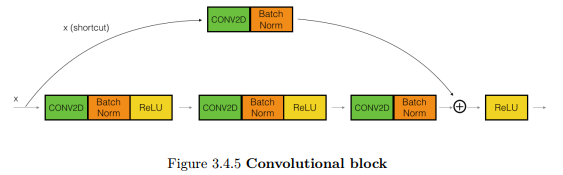

In [5]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    构建上图所示的 convolutional block
    
    Args:
        X: 输入数据
    """
    
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters
    X_shortcut = X
    
    # first component of main path
    X = layers.Conv2D(filters = F1, kernel_size = (1, 1), strides = (s, s), 
                     padding = 'valid', name = conv_name_base + '2a',
                     kernel_initializer = glorot_uniform(seed = 0))(X)